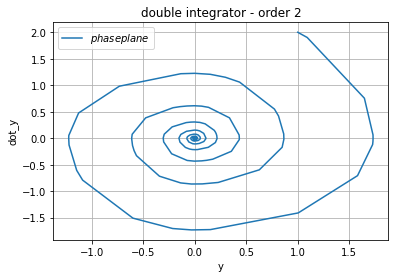

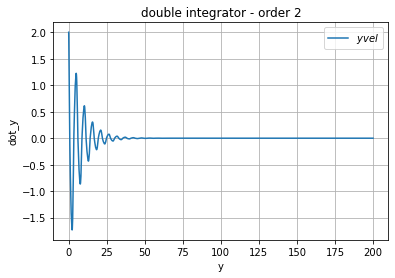

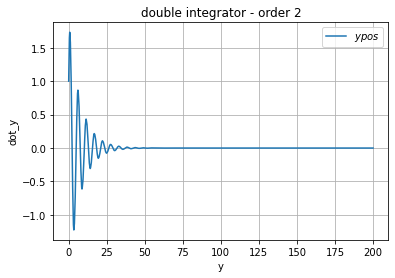

In [23]:
import matplotlib.pyplot as plt

"""
G(s) = k / (a2*s^2 + a1*s + a0)
"""

def order_2_system(time,X,k1,k2,a2,a1,a0,u):
    x1,x2 = X
    dotx1 = x2
    if x1*x2 > 0:
        u = -k1*x1
    else:
        u = -k2*x1
    dotx2 = (1/a2)*(-a1*x2 -a0*x1 + u) # u = força externa / sinal de controle
    return dotx1, dotx2

ti = 0
tf = 200
x10,x20=1,2 #assume que o sistema esta em repouso x = 0, dx = 0

# método de solução de ode Runge-Kutta implícito de ordem 5 RADAU
from scipy import integrate
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
sol1 = integrate.solve_ivp(order_2_system, t_span=(ti, tf), y0=(x10, x20), method='Radau', args=(2,1,1,0,0,1))
t1, Y1 = sol1.t, sol1.y

# Separando as soluções y1 é y, y2 é dot_y
y1_pos, y1_vel = Y1 # y1 posicao, y2 velocidade

plt.figure(1)
plt.plot(y1_pos, y1_vel, label=r'$phase plane$')
plt.legend()
plt.xlabel('y')
plt.title('double integrator - order 2')
plt.ylabel('dot_y')
plt.grid()
plt.show()

plt.plot(t1, y1_vel, label=r'$y vel$')
plt.legend()
plt.xlabel('y')
plt.title('double integrator - order 2')
plt.ylabel('dot_y')
plt.grid()
plt.show()

plt.plot(t1, y1_pos, label=r'$y pos$')
plt.legend()
plt.xlabel('y')
plt.title('double integrator - order 2')
plt.ylabel('dot_y')
plt.grid()
plt.show()
